In [1]:
##########################################
# Traveler trip dataset from kaggle.com #
##########################################
import sys
sys.path.append('/opt/anaconda3/lib/python3.7/site-packages')

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
# Read in csv file (pandas data frame)
data = pd.read_csv('Travel details dataset.csv')


In [3]:
# Data formatting ##############################################################################################

# Drop unnamed column with Nans, remove rows with NAs
data = data.drop(['Unnamed: 13'], axis=1)
data = data.dropna(axis=0, how="any")

# Remove country name in Destination if present (i.e. remove all characters from comma)
data['Destination']= data['Destination'].str.replace(r'\,.*', '', regex=True)

# Remove $ sign or "USD" in Accomodation Cost and Travel Cost
data['Accommodation cost']= data['Accommodation cost'].str.replace(r'\D', '', regex=True)
data['Transportation cost']= data['Transportation cost'].str.replace(r'\D', '', regex=True)

# Transform costs to int
data['Accommodation cost'] = data['Accommodation cost'].astype(int)
data['Transportation cost'] = data['Transportation cost'].astype(int)

# Transform Start Date and End Date to Datetime format
data['Start date'] = pd.to_datetime(data['Start date'])
data['End date'] = pd.to_datetime(data['End date'])

# Check data types
data.dtypes

Trip ID                          int64
Destination                     object
Start date              datetime64[ns]
End date                datetime64[ns]
Duration (days)                float64
Traveler name                   object
Traveler age                   float64
Traveler gender                 object
Traveler nationality            object
Accommodation type              object
Accommodation cost               int64
Transportation type             object
Transportation cost              int64
dtype: object

Text(0.5, 1.0, 'Transportation cost')

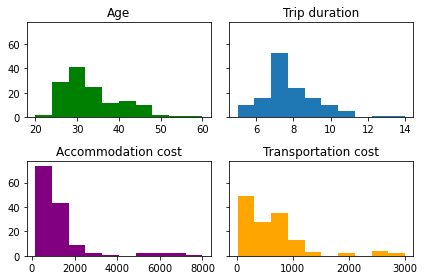

In [4]:
# Histograms #################################################################################

# Continuous variables ###

Duration = data['Duration (days)']
Accommodation_cost = data['Accommodation cost']
Transportation_cost = data['Transportation cost']
Age = data['Traveler age']

fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)


axs[0,0].hist(Age, color ='green')
axs[0,0].set_title('Age')
axs[0,1].hist(Duration)
axs[0,1].set_title('Trip duration')
axs[1,0].hist(Accommodation_cost, color = "purple")
axs[1,0].set_title('Accommodation cost')
axs[1,1].hist(Transportation_cost, color = "orange")
axs[1,1].set_title('Transportation cost')


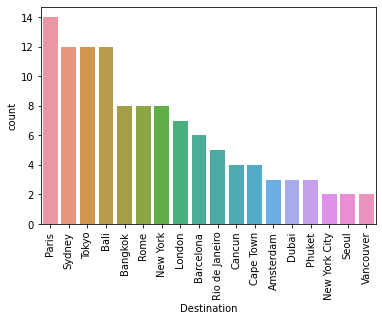

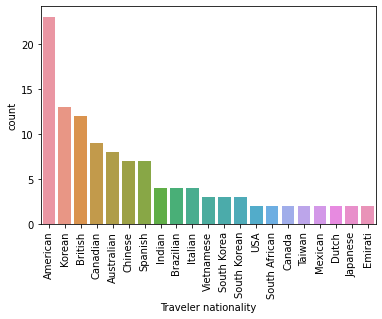

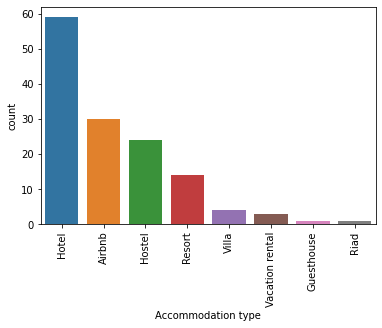

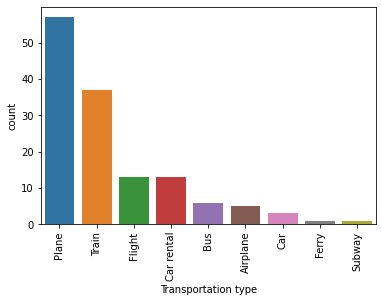

In [5]:
# Categorical variables ###


# Plot destinations that occur more than once and sort by occurrence
counts_des = data['Destination'].value_counts() 
valids_des = counts_des[counts_des>1].index
data_des = data[data['Destination'].isin(valids_des)]


sns.countplot(x = 'Destination',
              data = data_des,
              order = data_des['Destination'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


# Plot nationalities that occur more than once and sort by occurrence
counts_nat = data['Traveler nationality'].value_counts() 
valids_nat = counts_nat[counts_nat>1].index
data_nat = data[data['Traveler nationality'].isin(valids_nat)]


sns.countplot(x = 'Traveler nationality',
              data = data_nat,
              order = data_nat['Traveler nationality'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Plot accommodation type and sort by occurrence

sns.countplot(x = 'Accommodation type',
              data = data,
              order = data['Accommodation type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Plot transportation type and sort by occurrence

sns.countplot(x = 'Transportation type',
              data = data,
              order = data['Transportation type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

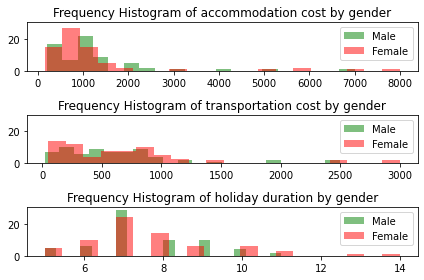

In [6]:
# Travel costs analysis ######################################################################

fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True)


# Do men and women spend an equal amount of money on accommodation?

x1 = data.loc[data['Traveler gender']=='Male', 'Accommodation cost']
x2 = data.loc[data['Traveler gender']=='Female', 'Accommodation cost']

kwargs = dict(alpha=0.5, bins=20)

axs[0].hist(x1, **kwargs, color='g', label='Male')
axs[0].hist(x2, **kwargs, color='r', label='Female')
axs[0].set_title('Frequency Histogram of accommodation cost by gender')
axs[0].legend();

# Do men and women spend an equal amount of money on transportation?

x1_t = data.loc[data['Traveler gender']=='Male', 'Transportation cost']
x2_t = data.loc[data['Traveler gender']=='Female', 'Transportation cost']

kwargs = dict(alpha=0.5, bins=20)

axs[1].hist(x1_t, **kwargs, color='g', label='Male')
axs[1].hist(x2_t, **kwargs, color='r', label='Female')
axs[1].set_title('Frequency Histogram of transportation cost by gender')
axs[1].legend();

# Do men and women book equally long holidays?
x1_d = data.loc[data['Traveler gender']=='Male', 'Duration (days)']
x2_d = data.loc[data['Traveler gender']=='Female', 'Duration (days)']

kwargs = dict(alpha=0.5, bins=20)

axs[2].hist(x1_d, **kwargs, color='g', label='Male')
axs[2].hist(x2_d, **kwargs, color='r', label='Female')
axs[2].set_title('Frequency Histogram of holiday duration by gender')
axs[2].legend();


  Transportation type  Transportation cost
0            Airplane          2700.000000
2                 Car          1433.333333
5              Flight           753.846154
6               Plane           753.508772
8               Train           344.594595
3          Car rental           296.153846
4               Ferry           150.000000
1                 Bus            70.833333
7              Subway            20.000000


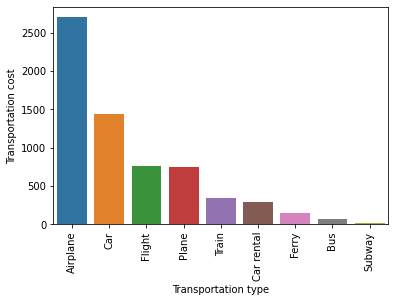

Transportation type     object
Transportation cost    float64
dtype: object


In [7]:
# How much does each type of transport cost on average?

data_trans = data.groupby('Transportation type')
average_cost = data_trans['Transportation cost'].mean().to_frame().reset_index().sort_values('Transportation cost', ascending=False)
print(average_cost)

sns.barplot(x = 'Transportation type',
            y = 'Transportation cost',
              data = average_cost)
plt.xticks(rotation=90)
plt.show()
print(average_cost.dtypes)

Text(0, 0.5, 'Accommodation cost')

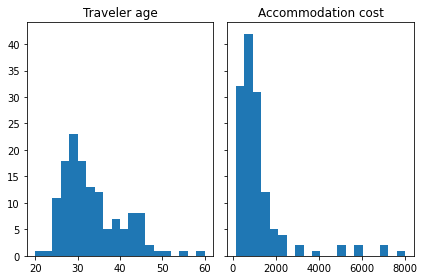

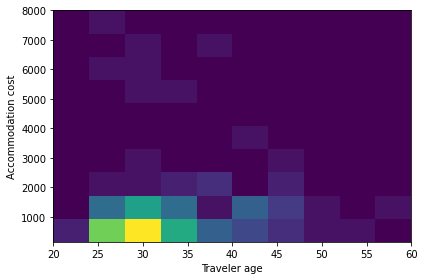

In [16]:
# Bivariate histograms

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(data['Traveler age'], bins=20)
axs[0].set_title('Traveler age')
axs[1].hist(data['Accommodation cost'], bins=20)
axs[1].set_title('Accommodation cost')

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(data['Traveler age'], data['Accommodation cost'])
plt.xlabel('Traveler age') 
plt.ylabel('Accommodation cost')


(0.04612064845995535, 0.5939132266503486)

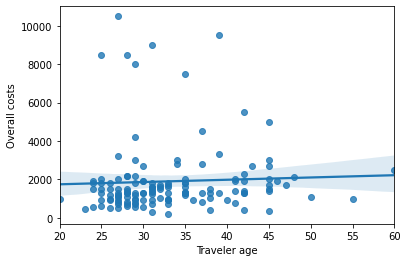

In [18]:
# Correlations

# Create new variable that sums up accommodation and travel costs
data['Overall costs'] = data['Transportation cost'] + data['Accommodation cost']

# Does age correlate with how much money people spent?
sns.regplot(data['Traveler age'], data['Overall costs'])
scipy.stats.pearsonr(data['Traveler age'], data['Overall costs'])

[ 18.49049001 220.36350013 468.88569885]
1093.6324771468476
[1868.71067771]
[2423.42537815]


<AxesSubplot:xlabel='Traveler age', ylabel='Overall costs'>

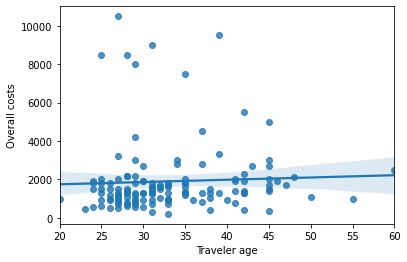

In [19]:
# Linear regression

# Can gender, nationality and age predict how much money people spent to go on holiday?
# Since American is the most frequent nationality, I created a variable representing American nationality (1 = yes, 0 = no)

# Transform gender into 0s and 1s
data['Gender'] = 0
data.loc[data['Traveler gender'] == 'Female', 'Gender'] = 1

# American nationality
data['American'] = 0
data.loc[data['Traveler nationality'] == 'American', 'American'] = 1

# Set up regression model
X = data[['Traveler age', 'Gender', 'American']]
regr = linear_model.LinearRegression()
regr.fit(X, data['Overall costs'])

# Print regression coefficient and intercept
print(regr.coef_)
print(regr.intercept_)

# Predict overall costs for different age groups
print(regr.predict([[30, 1, 0]]))
print(regr.predict([[60, 1, 0]]))

# Scatterplot with regression line
sns.regplot(data['Traveler age'], data['Overall costs'])
#sns.lmplot(x='Traveler age', y='Overall costs', hue = 'Gender', data = data)

In [44]:
# Average overall costs by nationality
average_costs= data_nat['Overall costs'].mean().to_frame().reset_index().sort_values('Overall costs', ascending=False)
print(average_costs)

    Traveler nationality  Overall costs
26         New Zealander    9500.000000
29         South African    2850.000000
28             Singapore    2700.000000
11               Emirati    2550.000000
33               Spanish    2328.571429
1             Australian    2328.125000
9                Chinese    2285.714286
0               American    2256.521739
3              Brazilian    2212.500000
34                Taiwan    2150.000000
4                British    2145.833333
13                German    2100.000000
7               Canadian    2044.444444
32                 Spain    2000.000000
18            Indonesian    1800.000000
38  United Arab Emirates    1800.000000
23                Korean    1646.153846
30           South Korea    1633.333333
10                 Dutch    1600.000000
37                   USA    1550.000000
16             Hong Kong    1400.000000
24               Mexican    1400.000000
20                 Italy    1350.000000
22              Japanese    1350.000000


In [21]:
# The function used above does not give p-values for the coefficients. Using a different function instead:

X = data[['Traveler age', 'Gender', 'American']]
Y = data['Overall costs']
mod = sm.OLS(Y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

print(p_values)
# The only significant predictor is Traveler age.

Traveler age    4.866929e-11
Gender          1.168106e-01
American        1.919363e-01
Name: P>|t|, dtype: float64
